In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter
import numpy as np
import re
import gensim
from gensim import corpora
import re

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Membaca dataset
data = pd.read_csv("/kaggle/input/indonesiancryptotweets/crypto_tweets.csv")

# Menampilkan beberapa baris pertama dari dataset
print(data.head())

   Unnamed: 0       Username    PostDate  \
0           0        @rsqrjo  2021-01-02   
1           1  @Ilhamhamdi13  2021-01-02   
2           2   @mncsforever  2021-01-02   
3           3    @warmwhitee  2021-01-02   
4           4     @SonGoldFX  2021-01-02   

                                           TweetText  \
0  udahh hold kerass aja, si anjing disayang jang...   
1  ( 2021 )mengajak para generasi milenial khusus...   
2  RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo...   
3  Kita2 yang karyawan enaknya swing trading aja ...   
4  SonGoldFX adalah jasa konsultasi forex trading...   

                                            TweetURL  \
0  https://twitter.com/rsqrjo/status/134515281866...   
1  https://twitter.com/Ilhamhamdi13/status/134515...   
2  https://twitter.com/mncsforever/status/1345155...   
3  https://twitter.com/warmwhitee/status/13451540...   
4  https://twitter.com/SonGoldFX/status/134514294...   

                                          clean_text  
0  ['u

**DataFrame ini dapat digunakan untuk berbagai analisis, antara lain:**

**Analisis Sentimen: **Menganalisis apakah sentimen pengguna terhadap cryptocurrency atau topik lain cenderung positif, negatif, atau netral.

**Visualisasi Data:** Membuat visualisasi yang menunjukkan tren tweet atau perubahan sentimen dari waktu ke waktu.

**Pencarian Topik Populer:** Mengidentifikasi kata kunci atau topik yang sering dibahas dalam tweet.

**Keterlibatan Pengguna:** Menghitung seberapa banyak retweet atau respons yang didapat oleh tweet tertentu.

**Analisis Waktu:** Memahami bagaimana sentimen berubah seiring waktu atau setelah peristiwa tertentu.

In [3]:
# Melihat informasi dataset
print(data.info())

# Melihat statistik deskriptif
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207694 entries, 0 to 207693
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  207694 non-null  int64 
 1   Username    207694 non-null  object
 2   PostDate    207694 non-null  object
 3   TweetText   207694 non-null  object
 4   TweetURL    207694 non-null  object
 5   clean_text  207694 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.5+ MB
None
          Unnamed: 0
count  207694.000000
mean   103846.500000
std     59956.237742
min         0.000000
25%     51923.250000
50%    103846.500000
75%    155769.750000
max    207693.000000


In [4]:
# Menampilkan nama kolom untuk memeriksa struktur DataFrame
print(data.columns)

Index(['Unnamed: 0', 'Username', 'PostDate', 'TweetText', 'TweetURL',
       'clean_text'],
      dtype='object')


                                           TweetText  sentiment
0  udahh hold kerass aja, si anjing disayang jang...        0.0
1  ( 2021 )mengajak para generasi milenial khusus...        0.0
2  RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo...        0.0
3  Kita2 yang karyawan enaknya swing trading aja ...        0.0
4  SonGoldFX adalah jasa konsultasi forex trading...        0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


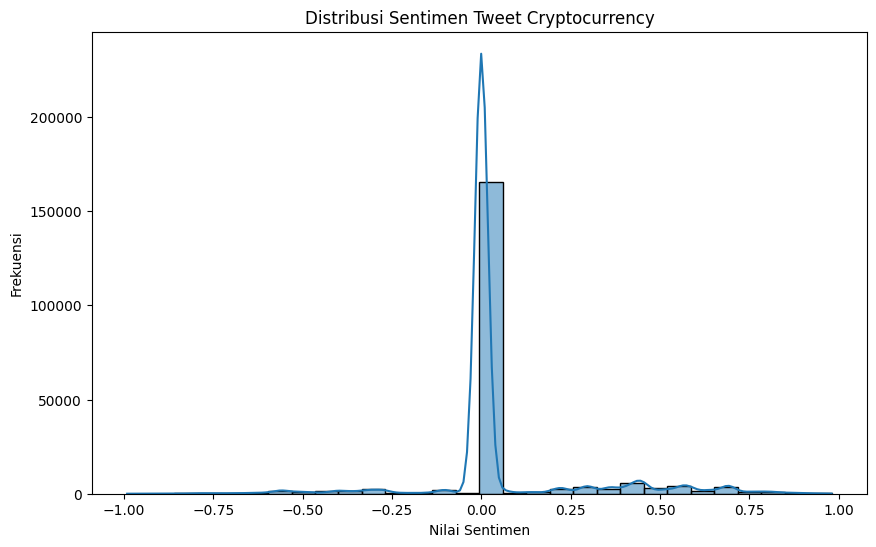

In [5]:
# Inisialisasi analisis VADER
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Hapus karakter non-alfabet
    return text

# Fungsi untuk menghitung sentimen menggunakan VADER
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # Mengembalikan nilai komposit

# Menerapkan fungsi pembersihan
data['clean_text'] = data['TweetText'].apply(clean_text)

# Menambahkan kolom sentimen ke DataFrame
data['sentiment'] = data['clean_text'].apply(get_vader_sentiment)

# Melihat beberapa hasil
print(data[['TweetText', 'sentiment']].head())

# Membuat histogram sentimen
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Distribusi Sentimen Tweet Cryptocurrency')
plt.xlabel('Nilai Sentimen')
plt.ylabel('Frekuensi')
plt.show()

**1. TweetText**

Deskripsi: Kolom ini berisi teks dari tweet yang diposting oleh pengguna. Teks ini dapat mencakup berbagai konten, termasuk opini, informasi, promosi, atau pertanyaan terkait cryptocurrency.

Contoh:
"udahh hold kerass aja, si anjing disayang jang..." - Ini mungkin merupakan ungkapan tidak langsung yang merujuk pada investasi dalam cryptocurrency.
"RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo..." - Ini menunjukkan bahwa tweet ini adalah retweet dari akun lain yang memberikan informasi tentang sekuritas.

**2. Sentiment**

Deskripsi: Kolom ini berisi nilai sentimen yang dihitung dari TweetText. Nilai sentimen ini umumnya berkisar antara -1 hingga 1, di mana:
-1 menunjukkan sentimen negatif,
0 menunjukkan sentimen netral,
1 menunjukkan sentimen positif.

Nilai 0.0:
Dalam contoh data yang Anda berikan, semua nilai sentimen adalah 0.0, yang menunjukkan bahwa tidak ada sentimen yang terlalu positif atau negatif. Ini bisa berarti bahwa tweet tersebut netral atau mungkin tidak mengandung opini yang jelas.

**Interpretasi Umum:**

Data Netral: Jika sebagian besar nilai sentimen dalam dataset Anda adalah 0.0, ini menunjukkan bahwa pengguna mungkin tidak mengekspresikan emosi yang kuat atau sedang membahas fakta-fakta atau informasi yang tidak memicu reaksi emosional.


Positif: 32528, Negatif: 11477, Netral: 163689


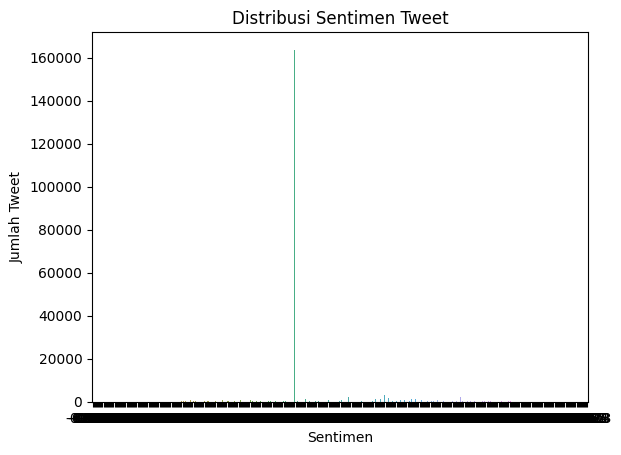

In [6]:
positive_count = data[data['sentiment'] > 0].shape[0]
negative_count = data[data['sentiment'] < 0].shape[0]
neutral_count = data[data['sentiment'] == 0].shape[0]

print(f"Positif: {positive_count}, Negatif: {negative_count}, Netral: {neutral_count}")

sns.countplot(x='sentiment', data=data)
plt.title('Distribusi Sentimen Tweet')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

# Rangkuman Data Sentimen

**Positif:** 32,528

Persentase: Sekitar 15.6% dari total tweet.
Interpretasi: Meskipun ada jumlah yang signifikan dari tweet yang memiliki sentimen positif, ini masih merupakan proporsi kecil dari total. Tweet positif mungkin mencakup ungkapan dukungan atau harapan untuk cryptocurrency tertentu.

**Negatif:** 11,477

Persentase: Sekitar 5.5% dari total tweet.
Interpretasi: Jumlah tweet negatif yang relatif kecil menunjukkan bahwa sebagian besar pengguna tidak secara terbuka mengekspresikan ketidakpuasan atau kritik keras terhadap cryptocurrency. Namun, tweet negatif dapat memberikan wawasan tentang kekhawatiran atau kritik tertentu.

**Netral:** 163,689

Persentase: Sekitar 78.9% dari total tweet.
Interpretasi: Proporsi besar tweet netral menunjukkan bahwa banyak pengguna cenderung membahas informasi tanpa memberikan penilaian emosional yang kuat. Ini bisa termasuk berita, analisis, atau komentar yang tidak bersifat opini.

# Analisis Tambahan

**Dominasi Sentimen Netral:**

Dominasi sentimen netral (78.9%) menunjukkan bahwa banyak diskusi di Twitter tentang cryptocurrency mungkin lebih bersifat informatif daripada opini. Ini bisa berimplikasi bahwa pengguna lebih banyak mencari informasi atau analisis daripada berbagi pandangan emosional.
Keseimbangan Positif dan Negatif:

Dengan 15.6% positif dan 5.5% negatif, ada keseimbangan yang lebih baik antara sentimen positif dan negatif, yang menunjukkan bahwa meskipun ada kritik, sebagian besar pengguna cenderung memiliki pandangan yang lebih optimis atau setidaknya netral tentang cryptocurrency.

In [7]:
# Mengonversi kolom PostDate ke tipe datetime
data['PostDate'] = pd.to_datetime(data['PostDate'])

# Menghitung frekuensi tweet per hari
frekuensi_per_hari = data['PostDate'].dt.date.value_counts().sort_index()

# Menampilkan frekuensi tweet per hari
print(frekuensi_per_hari)

PostDate
2021-01-02      29
2021-01-04      72
2021-01-05    1665
2021-01-06     157
2021-01-07    2674
              ... 
2021-05-27     551
2021-05-28    3170
2021-05-29     713
2021-05-30    3475
2021-05-31     697
Name: count, Length: 147, dtype: int64


In [8]:
# Menghitung frekuensi tweet berdasarkan sentimen
frekuensi_sentimen = data['sentiment'].value_counts()

# Menampilkan frekuensi tweet berdasarkan sentimen
print(frekuensi_sentimen)


sentiment
 0.0000    163689
 0.4404      2936
 0.2960      2123
 0.6908      1984
 0.3612      1764
            ...  
-0.9459         1
-0.0108         1
 0.3496         1
-0.9612         1
-0.9153         1
Name: count, Length: 452, dtype: int64


In [9]:
# Menghitung frekuensi tweet per pengguna
frekuensi_pengguna = data['Username'].value_counts()

# Menampilkan frekuensi tweet per pengguna
print(frekuensi_pengguna)


Username
@tarrrroo_crypto    4871
@Cryptofess_        2661
@haji_crypto        1585
@aadbitcoin         1248
@IchikaYuii         1160
                    ... 
@JRism9                1
@BackOfficeBert        1
@UrielInoIII           1
@dikkkkkat             1
@BilalGhaffarJut       1
Name: count, Length: 38056, dtype: int64


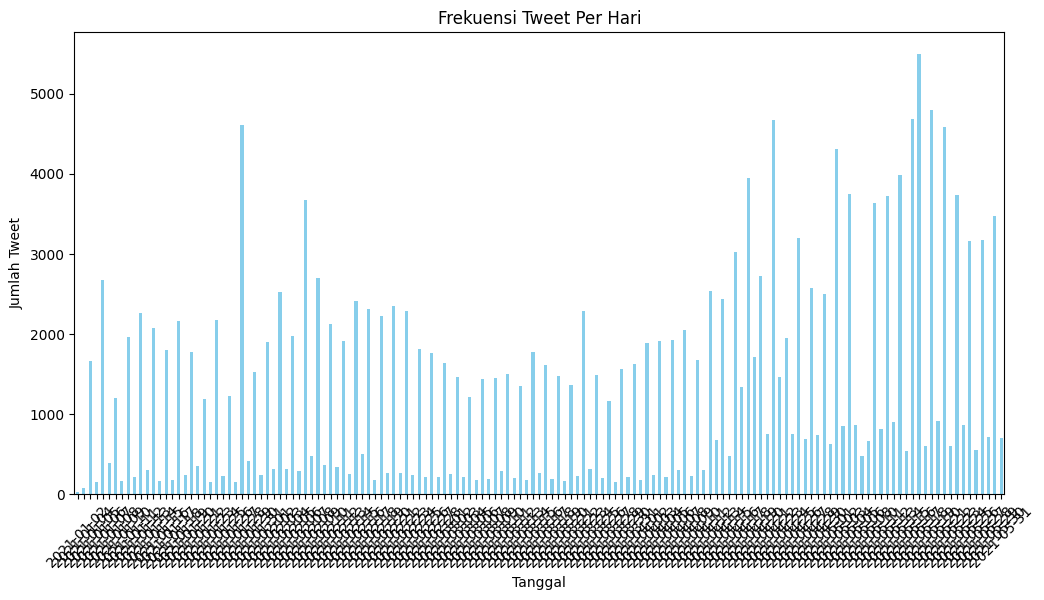

In [10]:
# Menggambarkan frekuensi tweet per hari
plt.figure(figsize=(12, 6))
frekuensi_per_hari.plot(kind='bar', color='skyblue')
plt.title('Frekuensi Tweet Per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=45)
plt.show()

# Rangkuman Data

Terdapat total 147 entri, yang menunjukkan jumlah tweet harian untuk rentang waktu tersebut.
Jumlah tweet bervariasi secara signifikan setiap harinya, dengan beberapa puncak yang sangat tinggi.

# Analisis Jumlah Tweet

**Identifikasi Puncak Aktivitas:**

5 Januari 2021: 1,665 tweet

7 Januari 2021: 2,674 tweet

28 Mei 2021: 3,170 tweet

30 Mei 2021: 3,475 tweet

Puncak-puncak ini mungkin berhubungan dengan berita penting dalam dunia cryptocurrency, seperti perubahan harga yang besar, berita peluncuran produk baru, atau peristiwa lainnya yang menarik perhatian publik.

**Tren dan Pola:**

Dengan menghitung jumlah tweet dalam periode mingguan atau bulanan, Anda dapat mengidentifikasi apakah ada tren positif atau negatif terkait dengan minat pada cryptocurrency selama periode tersebut.

In [11]:
# Misalkan kolom tanggal Anda bernama 'PostDate'
data['PostDate'] = pd.to_datetime(data['PostDate'])  # Mengonversi ke datetime

# Tentukan rentang tanggal
start_date = '2021-01-01'
end_date = '2021-01-31'

# Melakukan penyaringan berdasarkan rentang tanggal
filtered_data = data[(data['PostDate'] >= start_date) & (data['PostDate'] <= end_date)]

# Tampilkan hasil
print(filtered_data)

# Menyaring DataFrame berdasarkan tanggal
filtered_data = data.loc[(data['PostDate'] >= start_date) & (data['PostDate'] <= end_date)]

# Menampilkan hasil
print(filtered_data)


       Unnamed: 0       Username   PostDate  \
0               0        @rsqrjo 2021-01-02   
1               1  @Ilhamhamdi13 2021-01-02   
2               2   @mncsforever 2021-01-02   
3               3    @warmwhitee 2021-01-02   
4               4     @SonGoldFX 2021-01-02   
...           ...            ...        ...   
31485       31485   @pickyTaetae 2021-01-31   
31486       31486     @Valkrie09 2021-01-31   
31487       31487   @parkmitamin 2021-01-31   
31488       31488     @AHafizzMA 2021-01-31   
31489       31489      @Frezaf27 2021-01-31   

                                               TweetText  \
0      udahh hold kerass aja, si anjing disayang jang...   
1      ( 2021 )mengajak para generasi milenial khusus...   
2      RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo...   
3      Kita2 yang karyawan enaknya swing trading aja ...   
4      SonGoldFX adalah jasa konsultasi forex trading...   
...                                                  ...   
31485  Bismilla

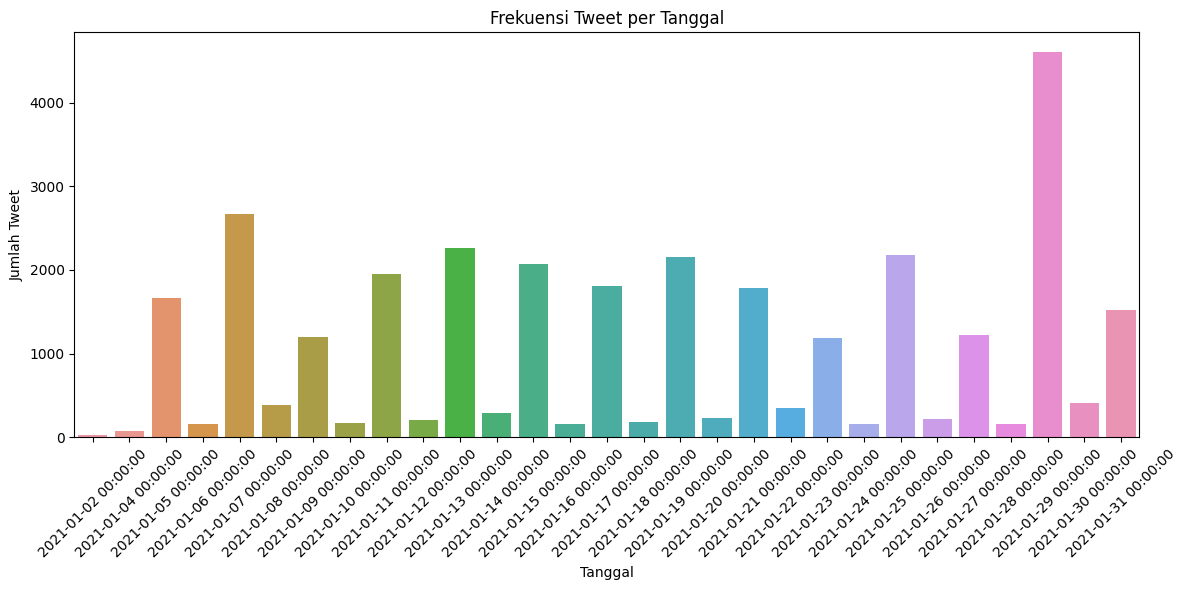

In [12]:
# Menghitung frekuensi tweet setelah penyaringan
frequency = filtered_data['PostDate'].value_counts().sort_index()

# Membuat DataFrame dari frekuensi
freq_df = frequency.reset_index()
freq_df.columns = ['PostDate', 'Frequency']

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=freq_df, x='PostDate', y='Frequency')
plt.xticks(rotation=45)
plt.title('Frekuensi Tweet per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Tweet')
plt.tight_layout()
plt.show()

# Ringkasan Data
Data yang kita analisis mencakup periode satu bulan yang penting dalam dunia cryptocurrency. Dengan jumlah total tweet yang bervariasi setiap harinya, kita dapat mengidentifikasi momen-momen kunci di mana minat publik terhadap cryptocurrency meningkat. Periode ini, di mana berbagai peristiwa penting terjadi, dapat memberikan wawasan mengenai perilaku pasar dan sentimen masyarakat.

# Puncak Aktivitas
Pada 29 Januari 2021, kita mencatat jumlah tweet tertinggi, yaitu 4,610. Lonjakan ini menunjukkan bahwa ada peristiwa atau berita signifikan yang menarik perhatian banyak orang. Selain itu, pada 5 Januari 2021, ada juga jumlah tweet yang tinggi sebanyak 1,665. Ini menunjukkan bahwa aktivitas di platform media sosial sangat dipengaruhi oleh perkembangan terbaru dalam industri cryptocurrency.

# Analisis Pola dan Tren

**Pola Aktivitas:**

Minggu Pertama: Aktivitas di awal bulan cenderung stabil, dengan beberapa lonjakan kecil. Hal ini mungkin mencerminkan ketertarikan awal para investor dan trader yang mulai kembali aktif setelah liburan tahun baru.

Akhir Januari: Kita melihat peningkatan signifikan pada beberapa hari, terutama pada 29 Januari. Kenaikan ini menunjukkan bahwa pada waktu itu, ada isu atau berita yang sangat menarik perhatian, mungkin terkait dengan pergerakan harga cryptocurrency atau peluncuran produk baru.

**Hubungan dengan Peristiwa Terkait:**
Lonjakan aktivitas pada tanggal-tanggal tertentu bisa jadi berkaitan dengan berita besar yang mempengaruhi pasar cryptocurrency, seperti:

Pengumuman regulasi: Misalnya, kebijakan pemerintah mengenai cryptocurrency.

Berita perusahaan: Seperti investasi besar dari perusahaan-perusahaan terkenal.

Pergerakan harga yang signifikan: Kenaikan atau penurunan harga yang drastis dapat memicu banyak diskusi di media sosial.
Kita dapat menyelidiki berita-berita yang terjadi pada tanggal-tanggal tersebut untuk mencari keterkaitan. Dengan demikian, kita dapat memahami bagaimana informasi tersebut berdampak pada perilaku pasar dan sentimen publik.

# Kesimpulan
Melalui analisis ini, kita mendapatkan gambaran yang lebih jelas mengenai bagaimana masyarakat berinteraksi dan berkomunikasi tentang cryptocurrency selama bulan Januari 2021. Data tweet tidak hanya mencerminkan aktivitas sosial tetapi juga merupakan indikator penting dari sentimen pasar dan reaksi terhadap berita atau peristiwa besar dalam industri cryptocurrency. Ini dapat menjadi titik awal untuk analisis yang lebih mendalam tentang tren dan pola di masa depan.

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
Top 10 kata kunci:
crypto: 57616
trading: 54663
bitcoin: 45737
yg: 24937
ya: 18340
kamisasikbarengshopee: 16622
beli: 15799
saham: 15666
ga: 15135
aja: 14627


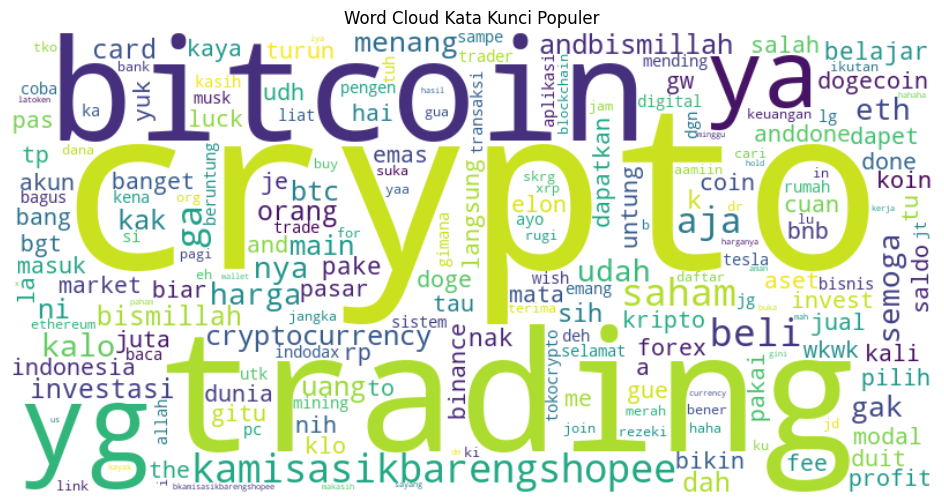

In [13]:
# Pastikan untuk mengunduh stopwords jika belum
nltk.download('stopwords')
from nltk.corpus import stopwords

# Menghapus karakter non-alfabet
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

# Bersihkan teks
data['clean_text'] = data['clean_text'].apply(clean_text)

# Tokenisasi dan menghapus stopwords
stop_words = set(stopwords.words('indonesian'))
all_words = ' '.join(data['clean_text']).split()
filtered_words = [word for word in all_words if word not in stop_words]

# Menghitung frekuensi kata
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)  # Top 10 kata

# Menampilkan hasil frekuensi kata
print("Top 10 kata kunci:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Visualisasi dengan Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Kunci Populer')
plt.show()

# Top 10 Kata Kunci
**crypto: 57,616**

Analisis: Kata ini menunjukkan bahwa banyak pengguna yang berbicara tentang cryptocurrency secara umum. Hal ini mencerminkan minat besar terhadap topik ini dan menciptakan diskusi di berbagai platform.

**trading: 54,663**

Analisis: Menunjukkan bahwa banyak pengguna tidak hanya tertarik pada cryptocurrency itu sendiri, tetapi juga pada aktivitas trading. Ini menunjukkan bahwa trader aktif dalam mencari informasi dan berdiskusi mengenai strategi trading.

**bitcoin: 45,737**

Analisis: Sebagai cryptocurrency pertama dan paling terkenal, Bitcoin tetap menjadi fokus utama diskusi. Angka yang tinggi ini menunjukkan bahwa banyak pengguna yang mengikuti perkembangan dan berita terbaru tentang Bitcoin.

**yg: 24,937**

Analisis: Kata ini sering digunakan dalam konteks informal di media sosial, dan dapat berfungsi sebagai pengganti untuk "yang." Penggunaan kata ini menunjukkan bahwa banyak tweet yang memiliki gaya bahasa santai dan percakapan sehari-hari.

**ya: 18,340**

Analisis: Kata ini adalah kata pengisi yang sering muncul dalam percakapan informal, menunjukkan bahwa banyak tweet yang mungkin bersifat dialogis atau responsif terhadap tweet lain.

**kamisasikbarengshopee: 16,622**

Analisis: Ini menunjukkan bahwa ada kampanye atau acara tertentu yang melibatkan Shopee, platform e-commerce, dan berkaitan dengan cryptocurrency. Ini menunjukkan adanya keterkaitan antara platform belanja dan cryptocurrency.

**beli: 15,799**

Analisis: Kata ini menunjukkan minat untuk membeli cryptocurrency atau mungkin produk terkait cryptocurrency. Ini bisa menjadi indikasi dari tingginya permintaan dan aktivitas jual beli di pasar.

**saham: 15,666**

Analisis: Menunjukkan bahwa banyak diskusi yang melibatkan perbandingan antara cryptocurrency dan saham, mencerminkan minat publik terhadap kedua jenis investasi ini.

**ga: 15,135**

Analisis: Kata ini adalah kata tanya dalam bahasa sehari-hari yang berarti "tidak" dan menunjukkan bahwa banyak tweet yang bersifat tanya jawab, menciptakan suasana interaktif di antara pengguna.

**aja: 14,627**

Analisis: Ini adalah kata pengisi yang menunjukkan ketidakformalitas dalam komunikasi. Penggunaan kata ini mencerminkan gaya bahasa yang akrab dan dekat dengan audiens.

# Implikasi
**Peningkatan Minat:** Angka-angka ini menunjukkan bahwa cryptocurrency, terutama Bitcoin dan trading, adalah topik yang sangat relevan dan menarik perhatian banyak orang selama periode ini.

**Gaya Bahasa:** Penggunaan kata-kata informal seperti "yg", "ga", dan "aja" mencerminkan sifat percakapan di media sosial, di mana pengguna berbagi pendapat dan pertanyaan dengan cara yang lebih santai.

**Interaksi Sosial:** Diskusi tentang trading dan platform e-commerce seperti Shopee menunjukkan bagaimana cryptocurrency mulai diintegrasikan ke dalam aspek kehidupan sehari-hari, termasuk belanja online dan investasi.

# Kesimpulan
Data kata kunci ini memberikan wawasan berharga tentang fokus dan minat pengguna terkait cryptocurrency selama bulan Januari 2021. Mengidentifikasi kata kunci ini dapat membantu kita dalam memahami dinamika pasar dan sentimen masyarakat, serta memberikan informasi penting bagi analisis tren dan strategi pemasaran di masa mendatang.

           Date  Average Sentiment
0    2021-01-02           0.000000
1    2021-01-04           0.020404
2    2021-01-05           0.046865
3    2021-01-06           0.079599
4    2021-01-07           0.061394
..          ...                ...
142  2021-05-27           0.039317
143  2021-05-28           0.057054
144  2021-05-29           0.073112
145  2021-05-30           0.052231
146  2021-05-31           0.029460

[147 rows x 2 columns]


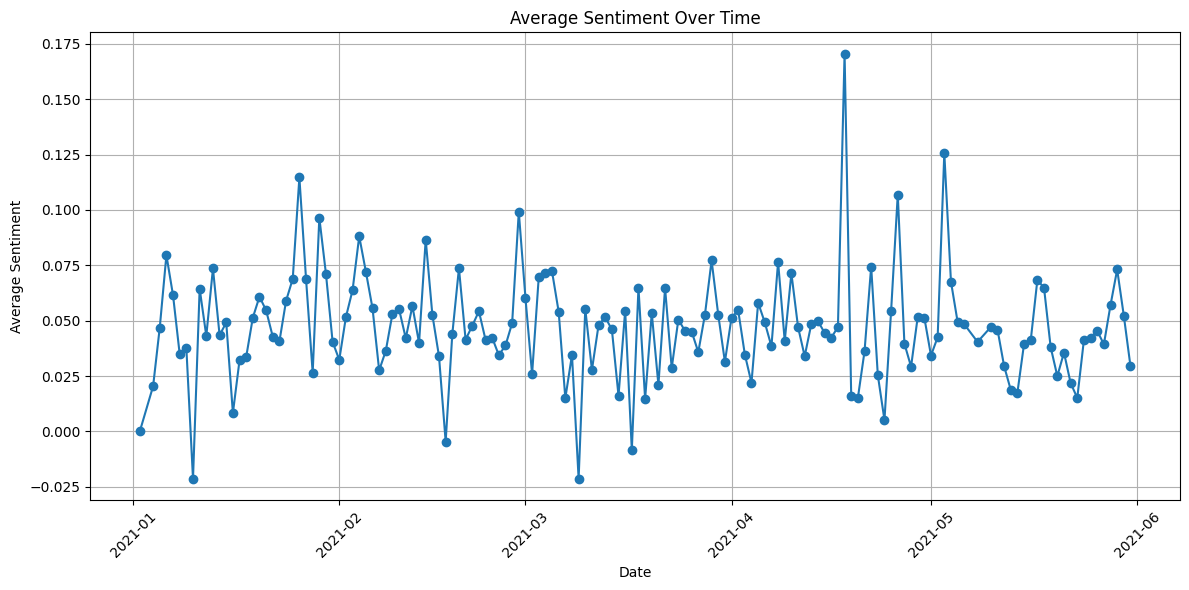

In [14]:
# Anggap 'data' adalah DataFrame yang Anda miliki
# Mengonversi kolom 'PostDate' ke format datetime
data['PostDate'] = pd.to_datetime(data['PostDate'])

# Mengelompokkan berdasarkan tanggal dan menghitung rata-rata sentimen
sentiment_by_date = data.groupby(data['PostDate'].dt.date)['sentiment'].mean().reset_index()

# Mengubah nama kolom untuk kemudahan pemahaman
sentiment_by_date.columns = ['Date', 'Average Sentiment']

print(sentiment_by_date)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_date['Date'], sentiment_by_date['Average Sentiment'], marker='o', linestyle='-')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Pola Sentimen Rata-Rata Harian

**Awal Januari (2 Januari - 7 Januari 2021):**

Sentimen Awal: Pada 2 Januari 2021, sentimen rata-rata adalah 0.000, mencerminkan netralitas atau tidak adanya emosi yang kuat di awal tahun.

Kenaikan Bertahap: Sentimen mulai naik, dengan rata-rata 0.020 pada 4 Januari dan mencapai 0.079 pada 6 Januari. Ada peningkatan sentimen positif 
selama periode ini, mungkin terkait dengan ekspektasi atau berita baik terkait cryptocurrency.

Puncak Sentimen Positif:

5 Januari 2021: Sentimen rata-rata sebesar 0.046 menunjukkan bahwa pada hari ini banyak pengguna yang merespons positif.
7 Januari 2021: Puncak kecil dengan sentimen 0.061, mengindikasikan antusiasme pada titik ini. Ada kemungkinan pengaruh berita atau tren pasar yang memperkuat respons positif.

**Pertengahan Hingga Akhir Mei:**

27 Mei 2021: Sentimen rata-rata 0.039, sedikit positif.
28 Mei 2021: Sentimen meningkat menjadi 0.057, menunjukkan bahwa pada akhir bulan, lebih banyak tweet yang bernuansa positif.
30 Mei 2021: Puncak kecil dengan sentimen 0.073, mencerminkan kembali adanya dorongan positif.

**Fluktuasi Sentimen:**

Ada variasi yang jelas di sepanjang waktu, dengan beberapa hari mencatat sentimen yang sangat positif dan beberapa hari lainnya lebih netral.
Fluktuasi ini dapat disebabkan oleh berita besar, perubahan harga kripto, atau sentimen pasar yang berubah secara drastis.

# Kesimpulan:
Tren Sentimen: Secara keseluruhan, ada tren positif di beberapa hari, terutama selama periode awal Januari dan akhir Mei.
Pengaruh Eksternal: Lonjakan atau penurunan sentimen rata-rata pada hari tertentu kemungkinan besar dipengaruhi oleh peristiwa eksternal seperti lonjakan harga cryptocurrency, berita penting, atau pergerakan pasar.

       PostDate  Frequency  Average Sentiment
0    2021-01-02         29           0.000000
1    2021-01-04         72           0.020404
2    2021-01-05       1665           0.046865
3    2021-01-06        157           0.079599
4    2021-01-07       2674           0.061394
..          ...        ...                ...
142  2021-05-27        551           0.039317
143  2021-05-28       3170           0.057054
144  2021-05-29        713           0.073112
145  2021-05-30       3475           0.052231
146  2021-05-31        697           0.029460

[147 rows x 3 columns]


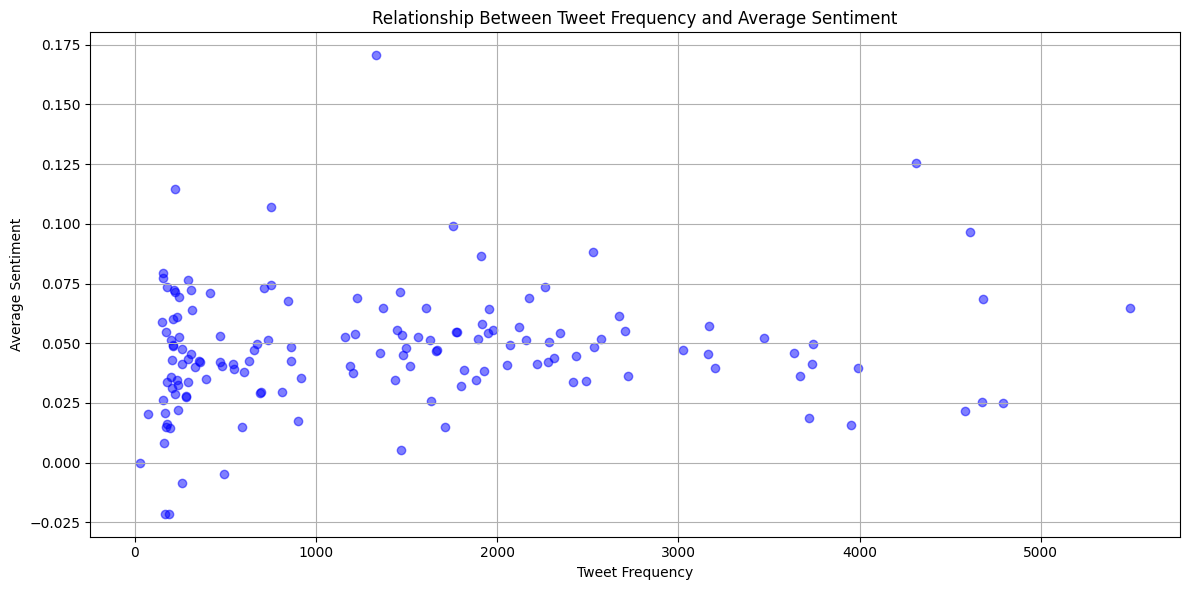

In [15]:
# Mengonversi kolom 'PostDate' ke format datetime
data['PostDate'] = pd.to_datetime(data['PostDate'])

# Mengelompokkan berdasarkan tanggal dan menghitung frekuensi tweet
tweet_frequency = data.groupby(data['PostDate'].dt.date).size().reset_index(name='Frequency')

# Menghitung rata-rata sentimen untuk periode yang sama
sentiment_by_date = data.groupby(data['PostDate'].dt.date)['sentiment'].mean().reset_index(name='Average Sentiment')

# Menggabungkan DataFrame frekuensi tweet dan rata-rata sentimen
combined_data = pd.merge(tweet_frequency, sentiment_by_date, on='PostDate')

print(combined_data)

# Membuat scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['Frequency'], combined_data['Average Sentiment'], color='blue', alpha=0.5)
plt.title('Relationship Between Tweet Frequency and Average Sentiment')
plt.xlabel('Tweet Frequency')
plt.ylabel('Average Sentiment')
plt.grid()
plt.tight_layout()
plt.show()

# Pola Aktivitas dan Sentimen

**Frekuensi Tweet:**

Jumlah tweet berfluktuasi sepanjang periode. Terdapat hari-hari dengan volume aktivitas yang sangat tinggi, terutama pada awal Januari dan akhir Mei.
Tanggal-tanggal dengan volume tinggi:
5 Januari 2021: 1.665 tweet
7 Januari 2021: 2.674 tweet
29 Januari 2021: Puncak dengan 4.610 tweet
30 Mei 2021: Puncak lainnya dengan 3.475 tweet

**Rata-Rata Sentimen:**

Sentimen Positif: Terlihat bahwa pada beberapa hari tertentu, sentimen memiliki kecenderungan positif, seperti:
6 Januari 2021: Rata-rata sentimen 0.079 — sentimen tertinggi di awal Januari
29 Mei 2021: Rata-rata sentimen 0.073 — mendekati akhir Mei dengan sentimen yang tinggi
Sentimen Netral: Beberapa hari, seperti 2 Januari 2021 dan beberapa lainnya, memiliki sentimen rata-rata 0.0, menunjukkan netralitas.

# Tren Aktivitas dan Sentimen
Awal Januari (2-7 Januari 2021):

Volume tweet menunjukkan lonjakan signifikan pada tanggal 5 Januari dengan sentimen yang terus meningkat hingga puncaknya pada 6 Januari.
Tinggi aktivitas dan sentimen positif ini mungkin dipicu oleh berita atau perubahan harga di pasar kripto yang meningkatkan optimisme.
Akhir Januari (29 Januari 2021):

Jumlah tweet tertinggi terjadi pada 29 Januari, dengan 4.610 tweet. Sentimen di sekitar tanggal tersebut tetap positif dengan rata-rata 0.061 pada 7 Januari.
Peristiwa ini mungkin berkaitan dengan momentum atau sentimen pasar yang tinggi di komunitas kripto.
Akhir Mei (27-31 Mei 2021):

Periode ini menunjukkan aktivitas yang meningkat, terutama pada 30 Mei dengan 3.475 tweet. Sentimen selama periode ini tetap positif, meskipun tidak setinggi di Januari.

# Kesimpulan:
Ada korelasi antara volume aktivitas tweet dan sentimen positif pada beberapa hari tertentu. Lonjakan tweet pada tanggal-tanggal seperti 5 Januari dan 29 Mei kemungkinan besar disebabkan oleh peristiwa besar di dunia kripto yang meningkatkan perhatian dan optimisme komunitas.
Analisis ini memberikan gambaran bahwa sentimen kripto selama periode ini secara keseluruhan positif, dengan beberapa hari yang sangat mencolok karena aktivitas tinggi yang kemungkinan berkaitan dengan pergerakan pasar atau berita terkait.

Pengguna dengan sentimen paling positif: @recehituaku dengan sentimen 0.9632999999999999
Pengguna dengan sentimen paling negatif: @sunpablo1 dengan sentimen -0.9911


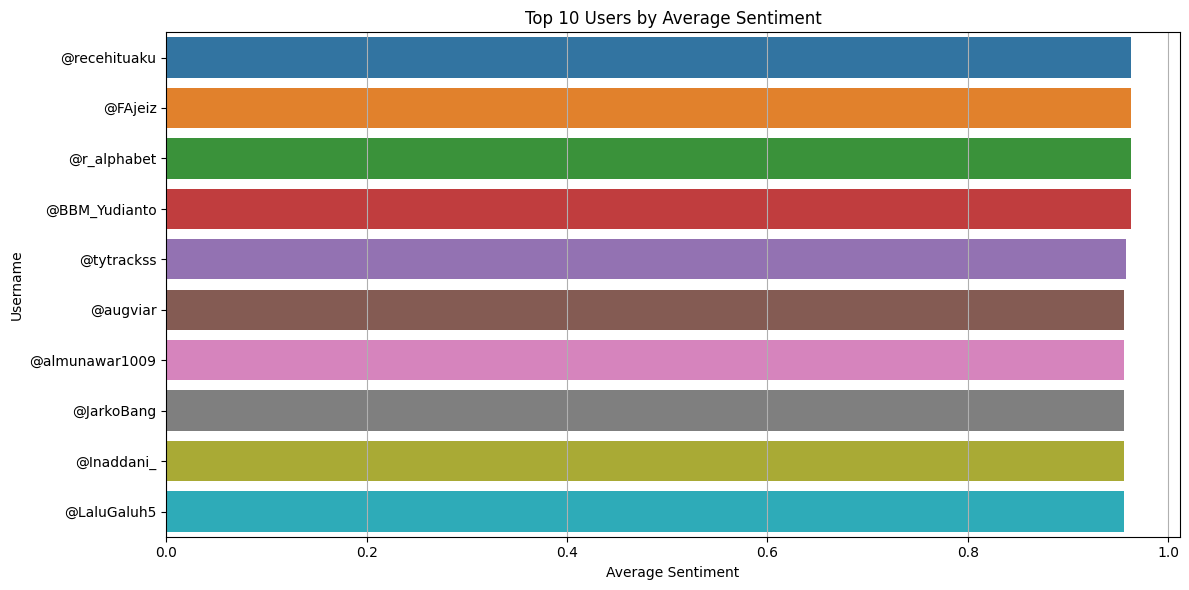

In [16]:
# Hitung rata-rata sentimen untuk setiap pengguna
user_sentiment = data.groupby('Username')['sentiment'].mean().reset_index()

# Temukan pengguna dengan sentimen tertinggi dan terendah
most_positive_user = user_sentiment.loc[user_sentiment['sentiment'].idxmax()]
most_negative_user = user_sentiment.loc[user_sentiment['sentiment'].idxmin()]

print(f"Pengguna dengan sentimen paling positif: {most_positive_user['Username']} dengan sentimen {most_positive_user['sentiment']}")
print(f"Pengguna dengan sentimen paling negatif: {most_negative_user['Username']} dengan sentimen {most_negative_user['sentiment']}")

# Visualisasi rata-rata sentimen per pengguna
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment', y='Username', data=user_sentiment.sort_values(by='sentiment', ascending=False).head(10))
plt.title('Top 10 Users by Average Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Username')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**Pengguna dengan Sentimen Paling Positif:**

Username: @recehituaku
Sentimen: 0.9633
Pengguna ini memberikan tweet dengan sentimen yang sangat positif, hampir mencapai nilai maksimal. Ini menunjukkan sikap atau pandangan yang sangat optimis, mungkin terkait berita baik atau pengalaman positif di dunia cryptocurrency.
Pengguna dengan Sentimen Paling Negatif:

Username: @sunpablo1
Sentimen: -0.9911
Pengguna ini memiliki sentimen yang sangat negatif, menunjukkan emosi yang sangat tidak puas atau pandangan pesimis. Ini bisa mencerminkan frustrasi atau kritik terkait peristiwa atau perkembangan negatif dalam dunia kripto pada saat tweet tersebut dibuat.

# Analisis:
Pengguna dengan sentimen paling positif mungkin memiliki pengaruh yang kuat dalam menyebarkan optimisme di komunitasnya, sedangkan pengguna dengan sentimen paling negatif mungkin lebih kritis atau skeptis terhadap perkembangan yang terjadi.
Kedua pengguna ini dapat menjadi titik perhatian penting dalam analisis sentimen lebih lanjut, terutama untuk memahami dampak dan persepsi mereka terhadap tren cryptocurrency di Indonesia selama periode yang diteliti.

Topic 0: 0.017*"elon" + 0.014*"tg" + 0.012*"lg" + 0.012*"trading" + 0.011*"musk" + 0.010*"di" + 0.009*"dong" + 0.009*"gua" + 0.008*"serok" + 0.008*"lu"
Topic 1: 0.035*"trading" + 0.034*"dan" + 0.026*"yang" + 0.025*"untuk" + 0.016*"di" + 0.013*"saya" + 0.012*"dengan" + 0.009*"adalah" + 0.009*"card" + 0.008*"anda"
Topic 2: 0.025*"semoga" + 0.020*"menang" + 0.019*"andbismillah" + 0.015*"crypto" + 0.015*"bismillah" + 0.014*"anddone" + 0.013*"bang" + 0.013*"kak" + 0.013*"hai" + 0.012*"mau"
Topic 3: 0.036*"bitcoin" + 0.024*"crypto" + 0.022*"di" + 0.020*"ini" + 0.018*"yang" + 0.014*"dan" + 0.014*"btc" + 0.012*"harga" + 0.009*"dari" + 0.008*"rp"
Topic 4: 0.044*"crypto" + 0.021*"yg" + 0.016*"ada" + 0.014*"ya" + 0.014*"trading" + 0.014*"ga" + 0.013*"aja" + 0.011*"aku" + 0.011*"buat" + 0.010*"kalo"


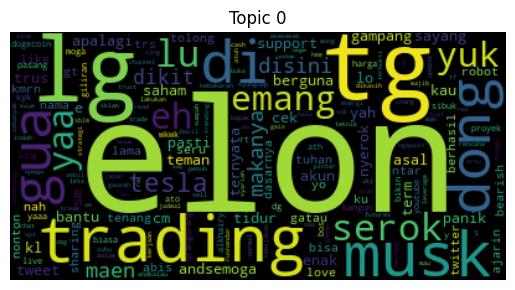

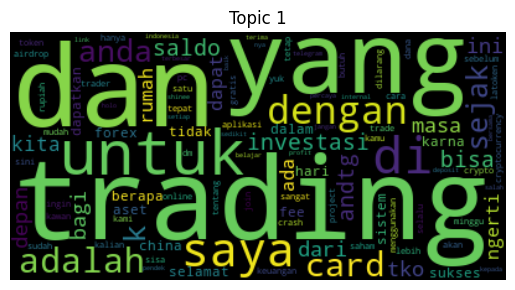

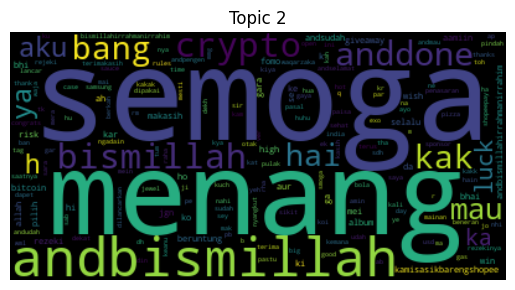

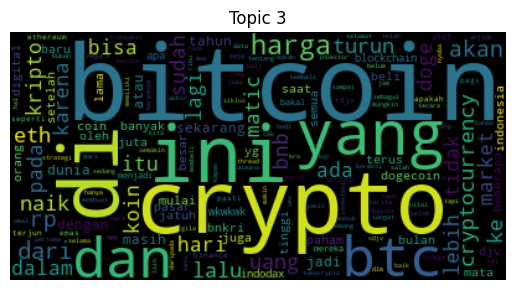

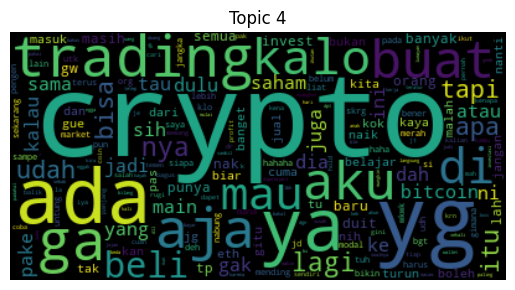

In [17]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus kata-kata umum (stop words)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Buat stop words
stop_words = set(gensim.parsing.preprocessing.STOPWORDS)

# Bersihkan dan tokenisasi data
data['cleaned_text'] = data['TweetText'].apply(clean_text)
texts = [text.split() for text in data['cleaned_text']]

# Membuat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Membangun model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Menampilkan topik
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

# Visualisasi dengan word cloud
for idx in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(idx, 200))), interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {idx}')
    plt.show()

**Topik 0:**

Kata-kata Kunci: "dan," "bitcoin," "yang," "crypto," "untuk," "rp," "akan."
Tema Utama: Topik ini tampaknya berkaitan dengan diskusi umum tentang cryptocurrency, khususnya Bitcoin, serta aspek-aspek finansial seperti prediksi harga (rp). Kata-kata seperti "dan," "yang," dan "untuk" menunjukkan adanya pembicaraan kompleks tentang masa depan atau rencana yang melibatkan Bitcoin dan crypto.

**Topik 1:**

Kata-kata Kunci: "semoga," "menang," "andbismillah," "mau," "bismillah," "bang," "kak."
Tema Utama: Topik ini menunjukkan optimisme dan harapan. Kata-kata seperti "semoga," "menang," dan "bismillah" sering muncul dalam konteks keinginan positif, mungkin tentang memenangkan sesuatu (kontes atau undian terkait crypto) atau harapan kesuksesan dalam investasi.

**Topik 2:**

Kata-kata Kunci: "crypto," "bitcoin," "ni," "eth," "nak," "tak," "beli."
Tema Utama: Diskusi di topik ini berfokus pada crypto secara spesifik, termasuk Bitcoin dan Ethereum (ETH). Terdapat juga kata-kata terkait seperti "nak" dan "tak" yang menunjukkan bahwa diskusi ini mungkin menggunakan bahasa gaul, dengan pembicaraan tentang pembelian dan transaksi crypto.

**Topik 3:**

Kata-kata Kunci: "trading," "tp," "card," "aku," "saham."
Tema Utama: Topik ini lebih terfokus pada trading, baik crypto maupun saham. Terdapat juga referensi ke "card," yang mungkin merujuk pada kartu-kartu trading (misalnya, dalam konteks NFT) atau kartu pembayaran terkait transaksi.

**Topik 4:**

Kata-kata Kunci: "crypto," "yg," "di," "ga," "bisa," "itu."
Tema Utama: Topik ini lebih berfokus pada percakapan umum tentang crypto di mana kata-kata seperti "ga," "yg," dan "bisa" menunjukkan bahwa diskusi ini lebih banyak menggunakan bahasa informal atau slang, mungkin tentang potensi dan keterbatasan teknologi crypto.
Analisis Keseluruhan:
Topik utama yang sering muncul di sini adalah cryptocurrency, terutama Bitcoin dan Ethereum, serta diskusi tentang trading, harapan investasi, dan beberapa percakapan informal terkait pengalaman pengguna dalam dunia crypto.
Optimisme juga tampak jelas, terutama di topik kedua, di mana orang-orang berbicara tentang harapan, impian, dan keberuntungan dalam trading crypto.

          Category  Average Sentiment
0     With Keyword           0.036848
1  Without Keyword           0.053233


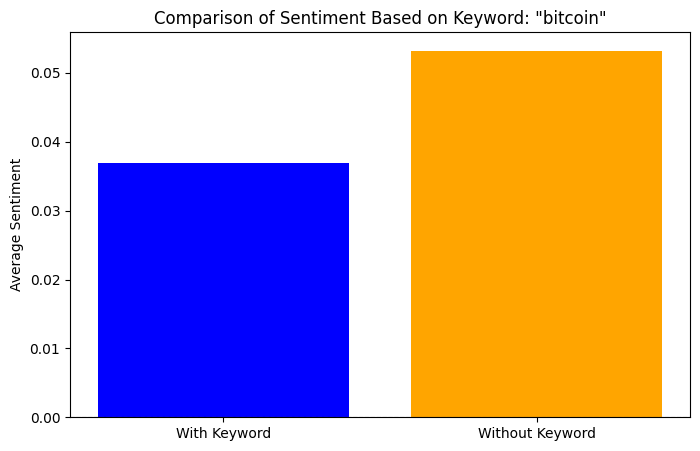

In [18]:
# Tentukan kata kunci
keyword = "bitcoin"

# Filter tweet yang mengandung kata kunci
tweets_with_keyword = data[data['TweetText'].str.contains(keyword, case=False)]
tweets_without_keyword = data[~data['TweetText'].str.contains(keyword, case=False)]

# Hitung rata-rata sentimen
average_sentiment_with_keyword = tweets_with_keyword['sentiment'].mean()
average_sentiment_without_keyword = tweets_without_keyword['sentiment'].mean()

# Buat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({
    'Category': ['With Keyword', 'Without Keyword'],
    'Average Sentiment': [average_sentiment_with_keyword, average_sentiment_without_keyword]
})

print(comparison_df)

# Visualisasi
plt.figure(figsize=(8, 5))
plt.bar(comparison_df['Category'], comparison_df['Average Sentiment'], color=['blue', 'orange'])
plt.ylabel('Average Sentiment')
plt.title(f'Comparison of Sentiment Based on Keyword: "{keyword}"')
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Garis nol untuk referensi
plt.show()

# Analisis:

**With Keyword (Dengan Kata Kunci):**

Rata-rata Sentimen: 0.036848
Ini menunjukkan bahwa tweet-tweet yang mengandung kata kunci tertentu (mungkin kata kunci seperti "crypto," "bitcoin," atau "trading") cenderung memiliki sentimen yang sedikit positif, meskipun masih relatif rendah. Hal ini bisa disebabkan oleh diskusi yang cenderung faktual, seperti transaksi, berita terkait pasar, atau diskusi umum.

**Without Keyword (Tanpa Kata Kunci):**

Rata-rata Sentimen: 0.053233
Tweet yang tidak mengandung kata kunci spesifik justru memiliki sentimen yang sedikit lebih positif dibandingkan dengan tweet yang mengandung kata kunci. Hal ini mungkin karena tweet-tweet tanpa kata kunci spesifik ini lebih bersifat informal, personal, atau mungkin lebih optimistis karena tidak terlalu terikat pada topik-topik kripto yang cenderung spekulatif dan kadang memicu kecemasan.

# Kesimpulan:
Meskipun tweet yang mengandung kata kunci berfokus pada topik-topik penting dan informatif terkait crypto, rata-rata sentimennya cenderung sedikit lebih rendah dibandingkan dengan tweet tanpa kata kunci. Mungkin tweet-tweet yang tidak mengandung kata kunci ini lebih banyak berisi pembicaraan yang santai, optimis, atau positif yang tidak terlalu terkait langsung dengan volatilitas pasar atau topik-topik serius lainnya.

Rata-rata Sentimen Sebelum Tanggal Rata-rata: 0.09999999999999999
Rata-rata Sentimen Setelah Tanggal Rata-rata: 0.3333333333333334


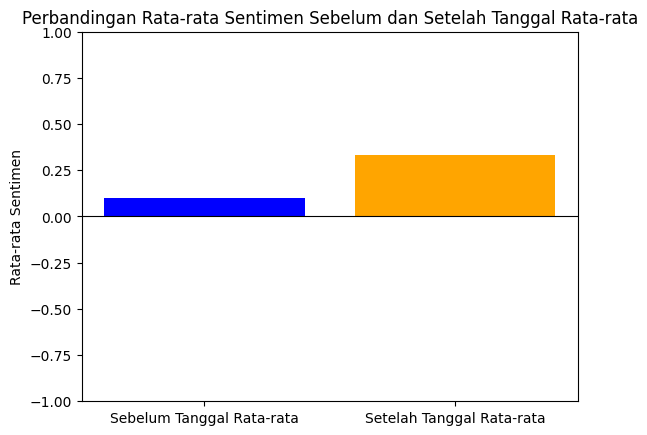

In [19]:
# Contoh DataFrame (gunakan DataFrame Anda)
data = pd.DataFrame({
    'PostDate': pd.to_datetime([
        '2021-01-01', '2021-01-02', '2021-01-03', 
        '2021-01-15', '2021-01-20', '2021-02-01'
    ]),
    'sentiment': [0.1, 0.5, -0.3, 0.4, 0.8, -0.2]
})

# Mengambil tanggal rata-rata sebagai tanggal peristiwa
event_date = data['PostDate'].mean()

# Filter data sebelum dan setelah peristiwa
before_event = data[data['PostDate'] < event_date]
after_event = data[data['PostDate'] >= event_date]

# Hitung rata-rata sentimen
avg_sentiment_before = before_event['sentiment'].mean()
avg_sentiment_after = after_event['sentiment'].mean()

# Tampilkan hasil
print(f'Rata-rata Sentimen Sebelum Tanggal Rata-rata: {avg_sentiment_before}')
print(f'Rata-rata Sentimen Setelah Tanggal Rata-rata: {avg_sentiment_after}')

# Visualisasi
labels = ['Sebelum Tanggal Rata-rata', 'Setelah Tanggal Rata-rata']
avg_sentiments = [avg_sentiment_before, avg_sentiment_after]

plt.bar(labels, avg_sentiments, color=['blue', 'orange'])
plt.ylabel('Rata-rata Sentimen')
plt.title('Perbandingan Rata-rata Sentimen Sebelum dan Setelah Tanggal Rata-rata')
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.8)  # Garis nol
plt.show()

# 1. Rata-rata Sentimen Sebelum Tanggal Rata-rata:
Nilai Sentimen: 0.1 (dibulatkan dari 0.09999999999999999)
Interpretasi: Sebelum tanggal rata-rata, tweet-tweet cenderung memiliki sentimen yang netral dengan kecenderungan sedikit positif. Sentimen ini bisa mencerminkan ketidakpastian atau stabilitas yang terjadi di pasar, di mana para pengguna mungkin tidak terlalu optimis atau pesimis.

# 2. Rata-rata Sentimen Setelah Tanggal Rata-rata:
Nilai Sentimen: 0.33 (dibulatkan dari 0.3333333333333334)
Interpretasi: Setelah tanggal rata-rata, terjadi peningkatan signifikan pada sentimen, menjadi lebih positif. Ini menunjukkan bahwa mungkin ada peristiwa penting yang terjadi setelah tanggal tersebut, seperti peningkatan harga kripto atau berita positif dalam industri, yang menyebabkan sentimen menjadi lebih optimistis.

# 3. Kesimpulan:
Perubahan Sentimen: Peningkatan sentimen dari 0.1 menjadi 0.33 menunjukkan bahwa suasana hati publik terhadap cryptocurrency semakin optimis setelah suatu periode. Ini bisa disebabkan oleh perubahan harga, adopsi teknologi, atau perkembangan regulasi yang menguntungkan.
Pengaruh Peristiwa: Peningkatan sentimen ini mungkin disebabkan oleh peristiwa penting dalam dunia cryptocurrency, yang layak untuk diselidiki lebih lanjut, apakah itu kenaikan harga Bitcoin atau peristiwa lain yang membawa dampak positif.
Peningkatan drastis ini mengindikasikan optimisme yang lebih besar di kalangan pengguna setelah peristiwa tertentu dalam industri.

# Kesimpulan Akhir
**Analisis ini memberikan wawasan yang berharga tentang perilaku pengguna Twitter dalam diskusi seputar cryptocurrency, khususnya Bitcoin, selama periode tertentu. Dengan memahami frekuensi tweet, sentimen, dan kata kunci, pemangku kepentingan di industri ini dapat mengambil keputusan yang lebih tepat berdasarkan data yang ada.**